# import libraries

re → Regular expressions (for text cleaning).
requests → To fetch web pages from the internet.
pandas → For handling and analyzing tabular data.
BeautifulSoup (from bs4) → To parse and extract data from HTML.

In [8]:
import re
import requests
import pandas as pd

from bs4 import BeautifulSoup

# Defines the URL of the website we want to scrape

In [9]:
url="https://www.worldometers.info/coronavirus/#google_vignette"

# Creates a header dictionary that mimics a real browser.

Many websites block bots → By adding a User-Agent, the request looks like it’s coming from Chrome, not a Python script.

In [10]:
request_header= {'Content-Type':'text/css; charset=UTF-8',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
     'Accept-Encoding': 'gzip, deflate, br'
}

# Sends a GET request to the website with the custom headers.Stores the server’s response

In [11]:
response=requests.get(url,headers=request_header)

# Prints the HTTP response code.

200 → Success 
404 → Page not found 
403 → Forbidden (blocked) 

In [12]:
print(response.status_code)

200


# Extracts the HTML source code of the page as text and stores it in

In [13]:
html_code=response.text

# Passes the HTML code into BeautifulSoup, which converts it into a structured format .

In [14]:
soup=BeautifulSoup(html_code)

# Extract the table tags

In [15]:
table = soup.find('table', id="main_table_countries_today")
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

# Extracts header names

In [16]:
headers = []
for i in table.find_all('th'):
    title = i.text
    headers.append(title)

In [45]:
headers

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/1M pop',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

# renamed to "Tests/1M pop" for clarity.

In [46]:
headers[13] = 'Tests/1M pop'

# created the dataframe as headers

In [47]:
df = pd.DataFrame(columns =headers)

In [48]:
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop


#  Extracts each cell (<td>) text.

In [49]:
for j in table.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [i.text for i in row_data]
    length = len(df)
    df.loc[length] = row

# Drops unwanted rows:

- First 7 rows (0:7) → Usually summary rows (like "World", "Asia", "Europe").
- Rows 222–229 → Probably footnotes, empty rows, or totals.
- Resets the index → So DataFrame is clean and starts from 0.

In [50]:
df.drop(df.index[0:7], inplace=True)
df.drop(df.index[222:229], inplace=True)
df.reset_index(inplace=True, drop=True)

# Saves the cleaned dataset into a CSV file.

In [51]:
df.to_csv('covid_data.csv', index=False)

df = pd.read_csv('covid_data.csv')

In [52]:
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,NaN,World,"704,753,890",0.0,"7,010,681",0.0,"675,619,811",790.0,"22,123,398","34,794",...,NaN,NaN,NaN,All,\n,NaN,NaN,NaN,NaN,NaN
1,1.0,USA,"111,820,082",NaN,"1,219,487",NaN,"109,814,428",NaN,"786,167",940,...,"1,186,851,502","3,544,901","334,805,269",North America,3,275,0.0,NaN,NaN,"2,348"
2,2.0,India,"45,035,393",NaN,"533,570",NaN,NaN,NaN,NaN,NaN,...,"935,879,495","665,334","1,406,631,776",Asia,31,"2,636",2.0,NaN,NaN,0.4
3,3.0,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,...,"271,490,188","4,139,547","65,584,518",Europe,2,391,0.0,NaN,NaN,NaN
4,4.0,Germany,"38,828,995",NaN,"183,027",NaN,"38,240,600",NaN,"405,368",NaN,...,"122,332,384","1,458,359","83,883,596",Europe,2,458,1.0,NaN,NaN,"4,833"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,NaN,Total:,"70,200,879",NaN,"1,367,332",NaN,"66,683,585",NaN,"2,149,962","8,953",...,NaN,NaN,NaN,South America,,NaN,NaN,NaN,NaN,NaN
229,NaN,Total:,"14,895,771",NaN,"33,015",NaN,"14,752,388",NaN,"110,368",31,...,NaN,NaN,NaN,Australia/Oceania,,NaN,NaN,NaN,NaN,NaN
230,NaN,Total:,"12,860,924",NaN,"258,892",NaN,"12,090,808",NaN,"511,224",529,...,NaN,NaN,NaN,Africa,,NaN,NaN,NaN,NaN,NaN
231,NaN,Total:,721,NaN,15,NaN,706,NaN,0,0,...,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN


# imports libraries

### matplotlib.pyplot → for plotting.
### seaborn → for better-looking visualizations
### ggplot style for consistency in plots.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots look better
plt.style.use("ggplot")
sns.set_theme()

# Shows the first 5 rows of the dataset.

In [54]:
df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,NaN,World,"704,753,890",0.0,"7,010,681",0.0,"675,619,811",790.0,"22,123,398","34,794",...,NaN,NaN,NaN,All,\n,NaN,NaN,NaN,NaN,NaN
1,1.0,USA,"111,820,082",NaN,"1,219,487",NaN,"109,814,428",NaN,"786,167",940,...,"1,186,851,502","3,544,901","334,805,269",North America,3,275,0.0,NaN,NaN,"2,348"
2,2.0,India,"45,035,393",NaN,"533,570",NaN,NaN,NaN,NaN,NaN,...,"935,879,495","665,334","1,406,631,776",Asia,31,"2,636",2.0,NaN,NaN,0.4
3,3.0,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,...,"271,490,188","4,139,547","65,584,518",Europe,2,391,0.0,NaN,NaN,NaN
4,4.0,Germany,"38,828,995",NaN,"183,027",NaN,"38,240,600",NaN,"405,368",NaN,...,"122,332,384","1,458,359","83,883,596",Europe,2,458,1.0,NaN,NaN,"4,833"


# DataFrame structure:

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    224 non-null    float64
 1   Country,Other        233 non-null    object 
 2   TotalCases           233 non-null    object 
 3   NewCases             2 non-null      float64
 4   TotalDeaths          233 non-null    object 
 5   NewDeaths            2 non-null      float64
 6   TotalRecovered       186 non-null    object 
 7   NewRecovered         7 non-null      float64
 8   ActiveCases          186 non-null    object 
 9   Serious,Critical     61 non-null     object 
 10  Tot Cases/1M pop     225 non-null    object 
 11  Deaths/1M pop        225 non-null    object 
 12  TotalTests           211 non-null    object 
 13  Tests/1M pop         211 non-null    object 
 14  Population           224 non-null    object 
 15  Continent            231 non-null    obj

# summary statistics

- Shows count, mean, min, max, quartiles.

In [56]:
df.describe()

,#,NewCases,NewDeaths,NewRecovered,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop
count,224.000000,2.0,2.0,7.000000,211.000000,0.0,0.0
mean,112.593750,0.0,0.0,343.428571,10.786730,NaN,NaN
std,64.972779,0.0,0.0,341.636677,26.841457,NaN,NaN
min,1.000000,0.0,0.0,14.000000,0.000000,NaN,NaN
25%,56.750000,0.0,0.0,35.000000,0.000000,NaN,NaN
50%,112.500000,0.0,0.0,350.000000,1.000000,NaN,NaN
75%,168.250000,0.0,0.0,590.000000,5.000000,NaN,NaN
max,231.000000,0.0,0.0,790.000000,196.000000,NaN,NaN


# Checks for missing values

In [57]:
print(df.isnull().sum())

#                        9
Country,Other            0
TotalCases               0
NewCases               231
TotalDeaths              0
NewDeaths              231
TotalRecovered          47
NewRecovered           226
ActiveCases             47
Serious,Critical       172
Tot Cases/1M pop         8
Deaths/1M pop            8
TotalTests              22
Tests/1M pop            22
Population               9
Continent                2
1 Caseevery X ppl        1
1 Deathevery X ppl      10
1 Testevery X ppl       22
New Cases/1M pop       233
New Deaths/1M pop      233
Active Cases/1M pop     34
dtype: int64


In [58]:
# Rename columns
df.columns = [col.strip().replace(" ", "_") for col in df.columns]

In [59]:
# Sort by total cases (example)
df_sorted = df.sort_values(by="TotalCases", ascending=False)
print(df_sorted.head(10))

         #           Country,Other TotalCases  NewCases  \
74    74.0                 Belarus    994,037       NaN   
131  131.0                     DRC     99,338       NaN   
75    75.0                  Latvia    982,505       NaN   
132  132.0           French Guiana     98,041       NaN   
201  201.0                   Niger      9,931       NaN   
202  202.0  St. Vincent Grenadines      9,674       NaN   
203  203.0           Guinea-Bissau      9,614       NaN   
204  204.0                 Comoros      9,109       NaN   
205  205.0     Antigua and Barbuda      9,106       NaN   
223  230.0              MS Zaandam          9       NaN   

                               TotalDeaths  NewDeaths TotalRecovered  \
74   7,118                                        NaN        985,592   
131  1,468                                        NaN         84,489   
75   6,715                                        NaN        971,406   
132    420                                        NaN         

# Cleans numeric columns

- Removes commas from numbers

In [60]:
# Remove commas and convert to numeric
df["TotalCases"] = df["TotalCases"].astype(str).str.replace(",", "").str.strip()
df["TotalCases"] = pd.to_numeric(df["TotalCases"], errors="coerce")

# Now filter countries with more than 1M cases
df_million = df[df["TotalCases"] > 1_000_000]
print(df_million[["Country,Other", "TotalCases"]])

    Country,Other  TotalCases
0           World   704753890
1             USA   111820082
2           India    45035393
3          France    40138560
4         Germany    38828995
..            ...         ...
227        Total:   253406198
228        Total:    70200879
229        Total:    14895771
230        Total:    12860924
232        Total:   704753890

[81 rows x 2 columns]


# clean the target columns (numeric columns)

- Creates a list of column names
- Iterates through the list
- Convert values to string and clean (Removes commas,Strips extra spaces)
- Convert cleaned values back to numeric

In [61]:
cols_to_clean = ["TotalCases", "TotalDeaths", "TotalRecovered"]
for col in cols_to_clean:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(",", "").str.strip()
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Group data by Continent

- For each continent, it sums the total COVID-19 cases.
- reset_index() converts the grouped data back into a clean DataFrame.

# why this is useful

- Instead of just per-country analysis, this gives you a continent-level summary.
- Helps spot regional trends 
- Useful for visualizations 

In [62]:
if "Continent" in df.columns:
    continent_cases = df.groupby("Continent")["TotalCases"].sum().reset_index()
    print(continent_cases)

           Continent  TotalCases
0             Africa    25719682
1                All  1409507780
2               Asia   443000530
3  Australia/Oceania    29790403
4             Europe   506812367
5      North America   263776861
6      South America   140399828


# `visuliasation`

#  Univariate Graphs 

## Histplot

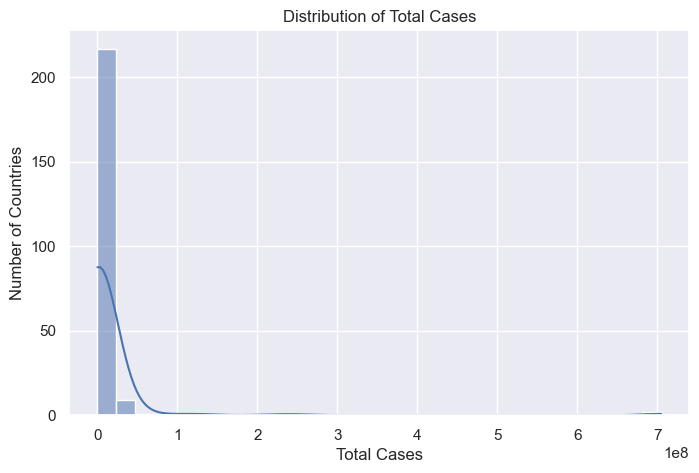

In [74]:
# Histogram of Total Cases
plt.figure(figsize=(8,5))
sns.histplot(df['TotalCases'], bins=30, kde=True)
plt.title("Distribution of Total Cases")
plt.xlabel("Total Cases")
plt.ylabel("Number of Countries")
plt.show()

# Barplot

- Bar Plot - Top 10 countries by Total Deaths

C:\Users\SINDHU\AppData\Local\Temp\ipykernel_9832\228456353.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalDeaths', y='Country,Other', data=top10_deaths, palette="Reds_r")


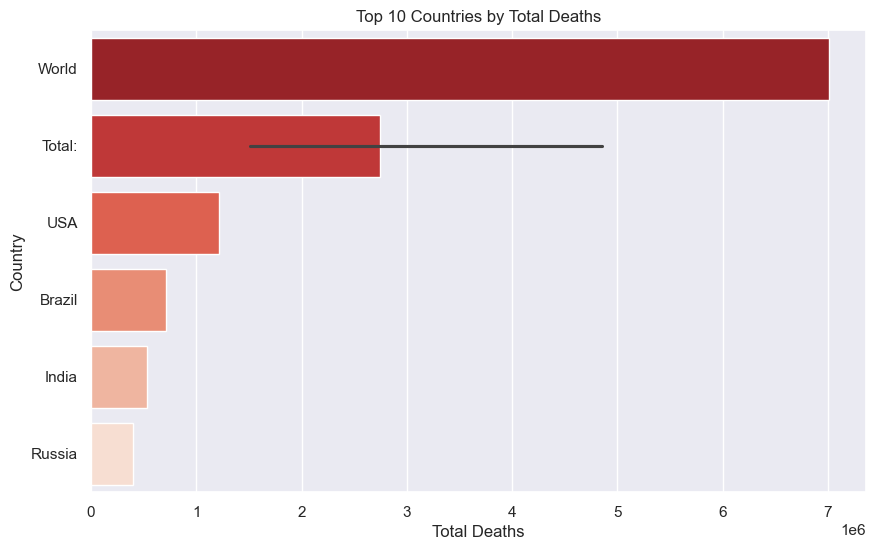

In [75]:
top10_deaths = df.nlargest(10, 'TotalDeaths')
plt.figure(figsize=(10,6))
sns.barplot(x='TotalDeaths', y='Country,Other', data=top10_deaths, palette="Reds_r")
plt.title("Top 10 Countries by Total Deaths")
plt.xlabel("Total Deaths")
plt.ylabel("Country")
plt.show()

# boxplot

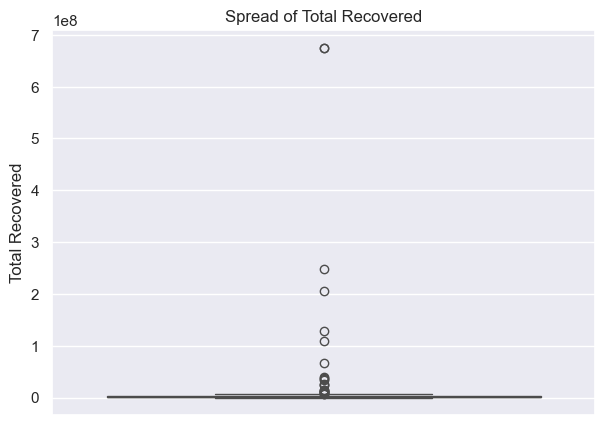

In [79]:
plt.figure(figsize=(7,5))
sns.boxplot(y=df['TotalRecovered'])
plt.title("Spread of Total Recovered")
plt.ylabel("Total Recovered")
plt.show()

# Bi variate Graphs

## scatter plot

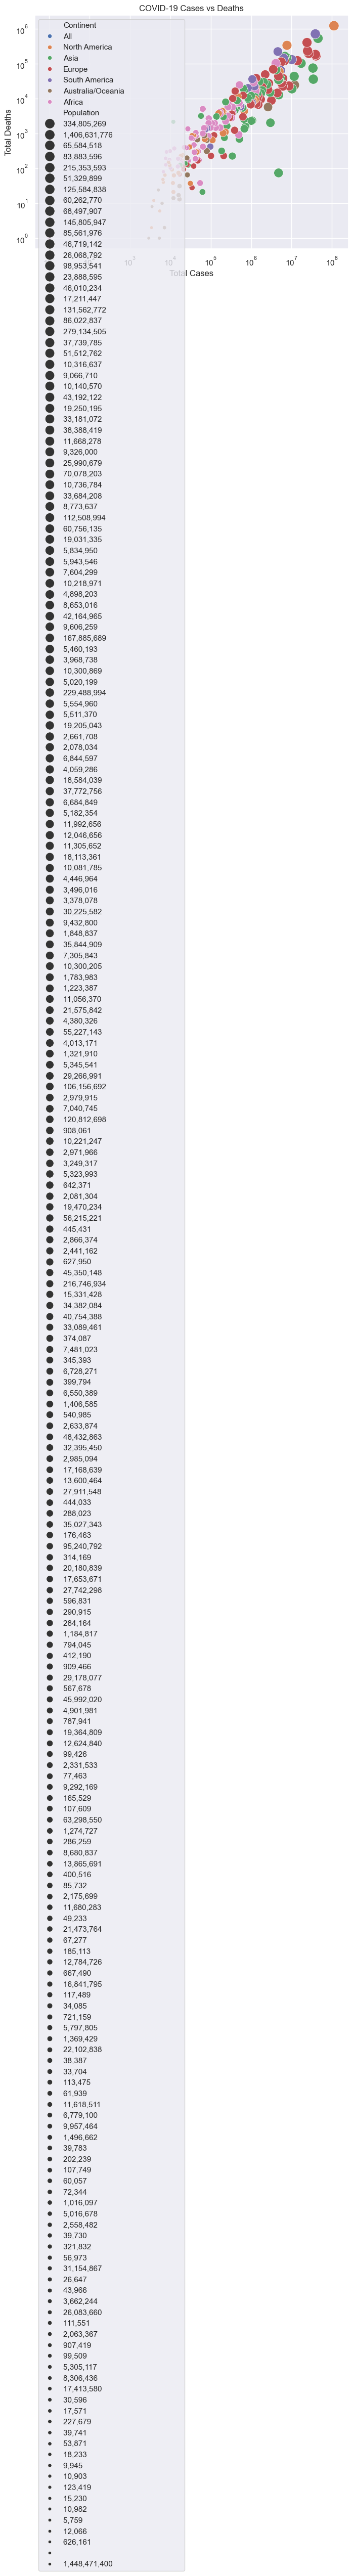

In [83]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="TotalCases", y="TotalDeaths", hue="Continent", size="Population", sizes=(20,200))
plt.title("COVID-19 Cases vs Deaths")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.xscale("log")
plt.yscale("log")
plt.show()

# heat map

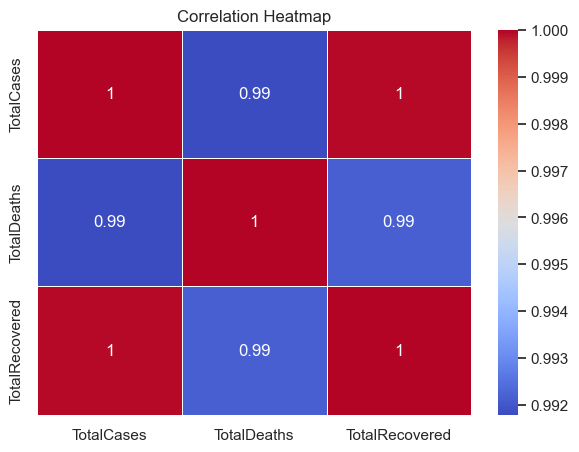

In [81]:
# Correlation Heatmap
plt.figure(figsize=(7,5))
corr = df[['TotalCases', 'TotalDeaths', 'TotalRecovered']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# heat map

- This charts shows corrlations between Totalcases,Newcases, Totaldeaths and NewDeaths etcc....
- annot - writes the numeric corrleation values
- cmap- color represention

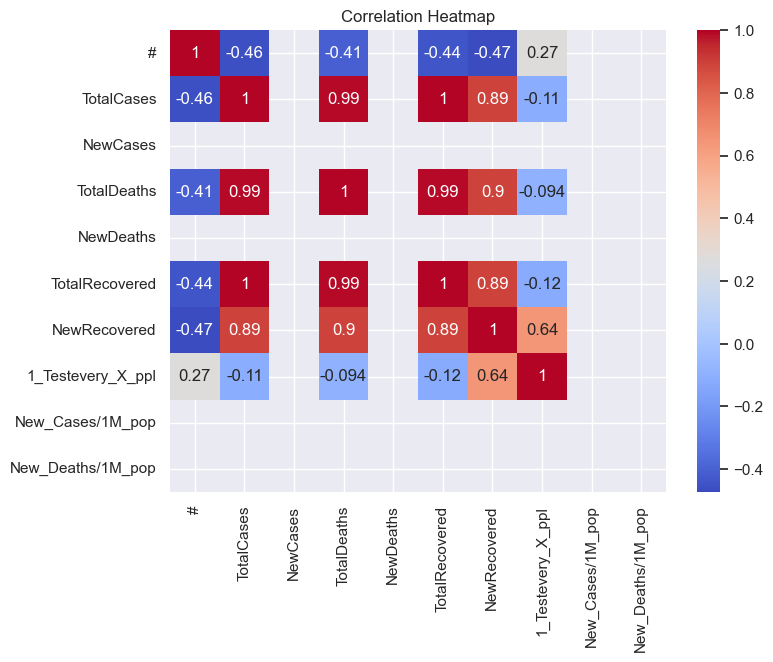

In [64]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# install plotly library

In [65]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [66]:
import plotly.express as px

In [67]:
df.columns

Index(['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases',
       'Serious,Critical', 'Tot Cases/1M_pop', 'Deaths/1M_pop', 'TotalTests',
       'Tests/1M_pop', 'Population', 'Continent', '1_Caseevery_X_ppl',
       '1_Deathevery_X_ppl', '1_Testevery_X_ppl', 'New_Cases/1M_pop',
       'New_Deaths/1M_pop', 'Active_Cases/1M_pop'],
      dtype='object')

# groupby continent

In [69]:
# Group by continent
continent_summary = df.groupby("Continent")[["TotalCases", "TotalDeaths", "TotalRecovered"]].sum().reset_index()

# Show table
print(continent_summary)

           Continent  TotalCases  TotalDeaths  TotalRecovered
0             Africa    25719682       517784    2.130232e+07
1                All  1409507780     14021362    1.351240e+09
2               Asia   443000530      3107324    3.141971e+08
3  Australia/Oceania    29790403        66030    2.936684e+07
4             Europe   506812367      4203648    4.845512e+08
5      North America   263776861      3391874    2.541470e+08
6      South America   140399828      2734664    1.326172e+08


# pie 

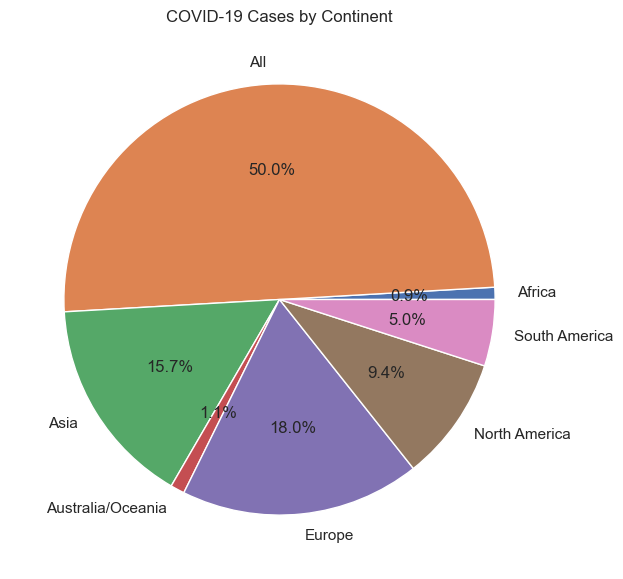

In [70]:
plt.figure(figsize=(7,7))
plt.pie(continent_summary["TotalCases"], labels=continent_summary["Continent"], autopct="%1.1f%%")
plt.title("COVID-19 Cases by Continent")
plt.show()

# barplot

C:\Users\SINDHU\AppData\Local\Temp\ipykernel_9832\2521587509.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Continent", y="TotalCases", data=continent_summary, palette="coolwarm")


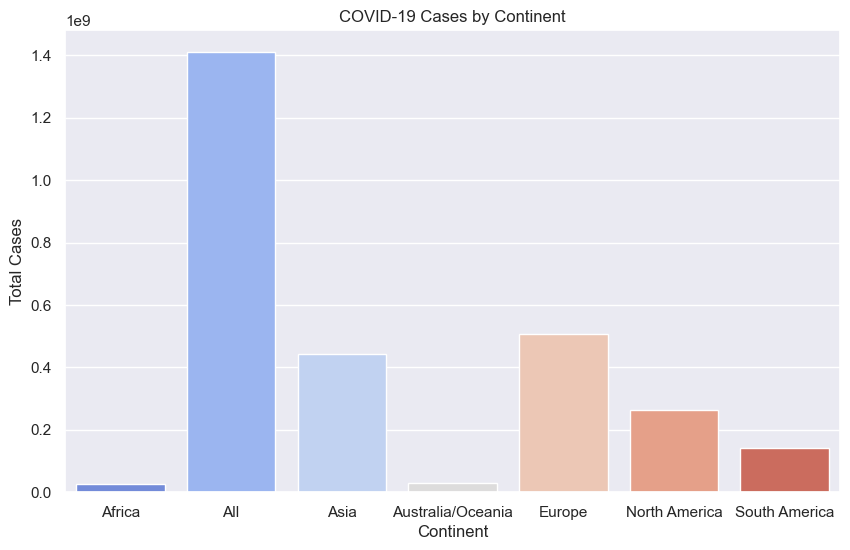

In [71]:
plt.figure(figsize=(10,6))
sns.barplot(x="Continent", y="TotalCases", data=continent_summary, palette="coolwarm")
plt.title("COVID-19 Cases by Continent")
plt.xlabel("Continent")
plt.ylabel("Total Cases")
plt.show()

# barplot

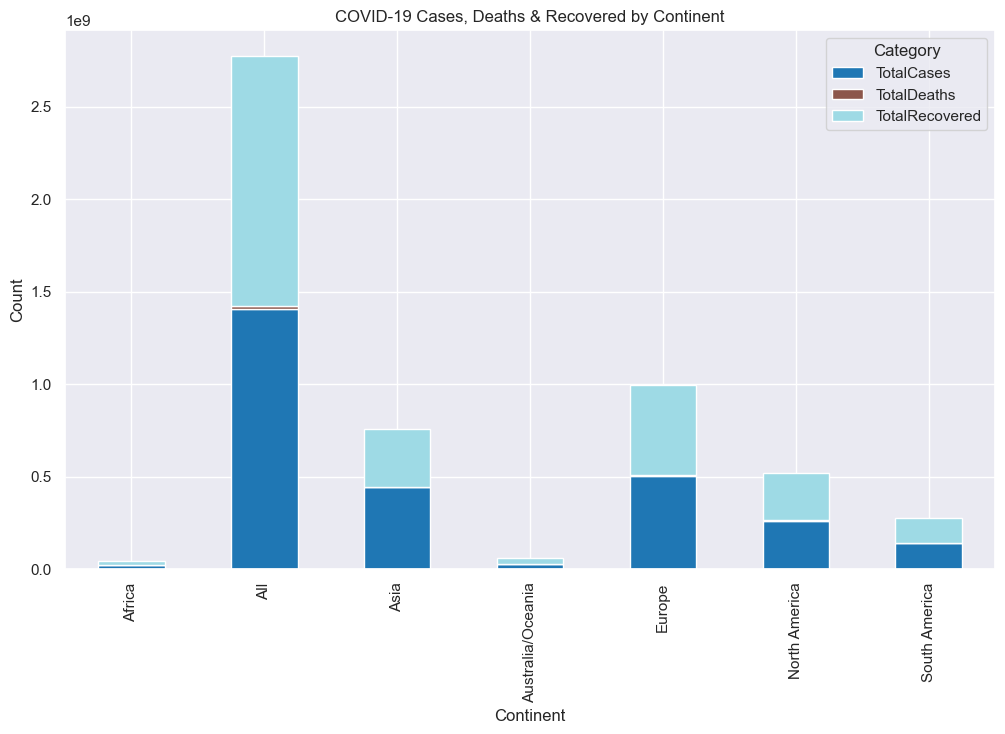

In [72]:
# Make sure we have the summary
continent_summary = df.groupby("Continent")[["TotalCases", "TotalDeaths", "TotalRecovered"]].sum().reset_index()

# Plot stacked bar
continent_summary.set_index("Continent")[["TotalCases", "TotalDeaths", "TotalRecovered"]].plot(
    kind="bar",
    stacked=True,
    figsize=(12,7),
    colormap="tab20"
)

plt.title("COVID-19 Cases, Deaths & Recovered by Continent")
plt.xlabel("Continent")
plt.ylabel("Count")
plt.legend(title="Category")
plt.show()